## Center Selection
Following Kleinberg and Tardos

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations, product
import matplotlib.patches as patches
import math

## Problem Description
Consider the following scenario. We have a set S of n sites—say, n little towns in upstate New York. We want to select k centers for building large shopping malls. We expect that people in each of these n towns will shop at one of the malls, and so we want to select the sites of the k malls to be central.
Let us start by defining the input to our problem more formally. We are given an integer k, a set S of n sites (corresponding to the towns), and a distance function. When we consider instances where the sites are points in the plane, the distance function will be the standard Euclidean distance between points, and any point in the plane is an option for placing a center. The algorithm we develop, however, can be applied to more general notions of distance. In applications, distance sometimes means straight-line distance, but can also mean the travel time from point s to point z, or the driving distance (i.e., distance along roads), or even the cost of traveling. Mathematically, any metric will do.

## Algorithm description
There are greedy ways to find solutions within a factor of two.

## Generate Instances

In [9]:
def make_cities(n=30):
    ans=[]
    for i in range(n):
        ans.append((random.uniform(-10,10),random.uniform(-10,10)))
    return ans

## Distance function

In [3]:
def distance(x,y):
    return math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

## Distance between finite sets

In [4]:
def set_distance(X,Y):
    ans=distance(X[0],Y[0])
    for x,y in product(X,Y):
        ans=min(ans,distance(x,y))
    return ans
        

## Find Radius

In [5]:
def find_radius(places,centers):
    distance_list=[]
    for place in places:
        distance_list.append(set_distance(centers,[place]))
    return max(distance_list)


## Greedy algorithm given r

In [70]:
def Greedy_centers_given_r(instance,r):
    remaining=instance.copy()
    centers=[]
    while remaining:
        new_center=remaining[0]
        centers.append(new_center)
        remaining=[place for place in remaining if distance(place,new_center)>2*r]
            
    return centers
            

In [71]:
instance=make_cities()

In [75]:
Greedy_centers_given_r(instance,2)

[(7.0512137682760425, -9.104708528522492),
 (-8.03639851759881, -1.3212177481927867),
 (8.914446475457279, 1.6032071778024743),
 (-5.259873502143845, -8.859456385378854),
 (-8.85672809581612, -6.928221014453109),
 (3.8362793912236164, 7.326541534648779),
 (-0.7301830933342401, -3.350397808243577),
 (6.303082175393161, -1.504397976915076),
 (-7.778496091364994, 5.027830005481368),
 (9.40409986294243, 9.271630076051682),
 (-5.148187030137919, 9.36693414928865),
 (-0.25022145368208193, -7.385954962977972)]

## Greedy algorithm

In [95]:
## 
def Greedy_centers(instance,k):
    if k>len(instance):
        return "There are more centers than cities, choose a center in each city"
    # choose the first center randomly
    centers=[instance[0]]
    #consider the remaining centers
    remaining=instance[1:].copy()
    distance_to_center=dict()
    for place in remaining:
        distance_to_center[place]=distance(place,instance[0])
    for i in range(k-1):
        new=remaining[0]
        for place in remaining:
            if distance_to_center[place]>distance_to_center[new]:
                new=place
        centers.append(new)
        remaining.remove(new)
        for place in remaining:
            distance_to_center[place]=min(distance_to_center[place],distance(place,new))
    ans=dict()
    ans["centers"]=centers
    ans["radius"]=find_radius(instance,centers)
    return ans
        


In [16]:
instancia=make_cities(50)

In [17]:
res=Greedy_centers(instancia,20)

In [19]:
res["radius"]

3.00135033929542

## Find radius

In [112]:
def find_radius(places,centers):
    distance_list=[]
    for place in places:
        distance_list.append(set_distance(centers,[place]))
    return max(distance_list)



In [113]:
instancia

[(-4.310335552800197, -8.48810114361732),
 (6.838287479535072, -5.299513412631642),
 (0.35235696554975604, -1.0521245282998315),
 (1.9951827578067984, -1.6430580490418514),
 (-4.031320845052941, 2.932349790291539),
 (2.4719681786059855, 0.24842048972628028),
 (-7.087227641675353, -9.298495999123773),
 (3.6392511614538297, -0.4852404773431669),
 (-4.1155482655701086, 7.485862246553403),
 (6.343311437372233, 1.0152794924003956),
 (2.857355640735662, -3.075803168909621),
 (6.418643948842028, -1.1688004463851378),
 (-6.203444387830055, 0.8549031307367585),
 (6.842739261475341, -1.9938072184337923),
 (-0.8913501765043979, 1.3212683232415223),
 (8.535146287686878, 3.7380422442291756),
 (-2.2152670207629566, 7.588225123868682),
 (0.16314931055418214, 4.600153853367901),
 (-5.5138242902300245, 6.665656327340983),
 (-5.763918860605257, 3.3705253443058787),
 (-3.153456002782793, -1.8695266987358856),
 (-5.446486073099215, -9.879214009197284),
 (-9.766022114712381, -5.01838649779482),
 (1.4852662

In [114]:
r=find_radius(instancia,centers)

In [115]:
r

2.8927269997510576

In [116]:
r

2.8927269997510576

### Plot greedy solution

In [27]:
def plot_greedy_centers(places,centers,radius):
    
    # List of points
    points = places

    # List of centers and their radii
    #radii = [0.5, 1]

    # Create a new figure and axis
    fig, ax = plt.subplots()
    #Setting the background colors
    ax.set_facecolor('black')
    fig.set_facecolor('black')

    # Plot the points
    for x, y in points:
        ax.plot(x, y, 'o',color="orange")  # 'bo' means blue color, round points

    # Plot the circles
    for center in centers:
        circle = patches.Circle(center, radius, fc='none', ec='green')  # fc is face color, ec is edge color
        ax.add_patch(circle)

    # Set aspect of the plot to be equal, so circles aren't elliptic
    ax.set_aspect('equal', 'box')
    #ax.set_xlim(0, 5)
    #ax.set_ylim(0, 6)

    # Display the plot
    plt.show()


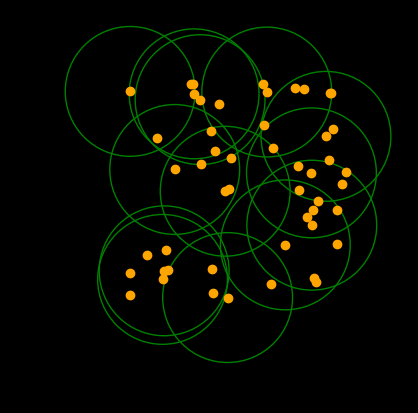

In [59]:
plot_greedy_centers(instancia,Greedy_centers_given_r(instancia,3),6)

In [154]:
def plot_instance(places):
    
    # List of points
    points = places.copy()

    # List of centers and their radii
    #radii = [0.5, 1]

    # Create a new figure and axis
    fig, ax = plt.subplots()
    #Setting the background colors
    ax.set_facecolor('black')
    fig.set_facecolor('black')

    # Plot the points
    for x, y in points:
        ax.plot(x, y, 'o',color="orange")  # 'bo' means blue color, round points

    # Plot the circles
    # for center in centers:
    #     circle = patches.Circle(center, radius, fc='none', ec='r',color="deeppink")  # fc is face color, ec is edge color
    #     ax.add_patch(circle)

    # # Set aspect of the plot to be equal, so circles aren't elliptic
    ax.set_aspect('equal', 'box')
    #ax.set_xlim(0, 5)
    #ax.set_ylim(0, 6)

    # Display the plot
    plt.show()


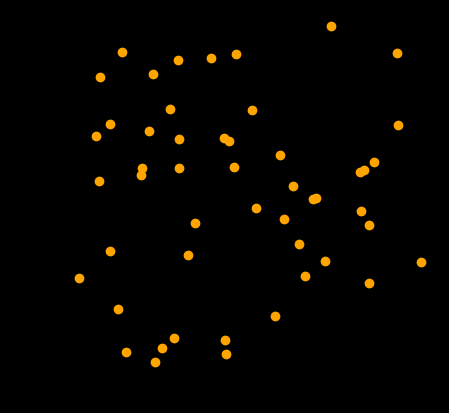

In [152]:
plot_instance(instancia)

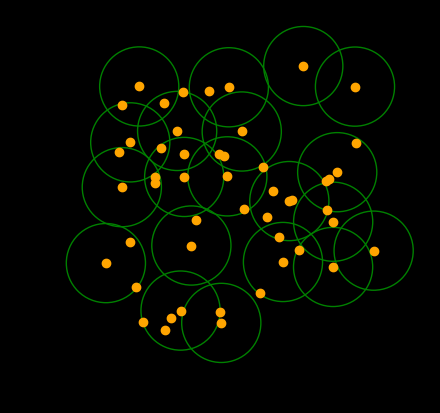

In [156]:
plot_greedy_centers(instancia,centers,r)

## Animate greedy centers given r

In [85]:
def animate_greedy_centers_given_r(places, r):

    fig, ax = plt.subplots()

    # format figure
    fig.set_facecolor('black')
    ax.set_facecolor('black')
     # List of points
    ax.set_xlim(min([place[0] for place in places])-2*r, max([place[0] for place in places])+2*r)   # Setting x-axis limits
    ax.set_ylim(min([place[1] for place in places])-2*r, max([place[1] for place in places])+2*r)   # Setting x-axis limits
       
    # List of centers and their radii
    #radii = [0.5, 1]

    # Plot the points
    for x, y in places:
        ax.plot(x, y, 'o',color="orange")  # 'bo' means blue color, round points

    # Plot the circles
    # for center in centers:
    #     circle = patches.Circle(center, radius, fc='none', ec='r',color="deeppink")  # fc is face color, ec is edge color
    #     ax.add_patch(circle)

    # # Set aspect of the plot to be equal, so circles aren't elliptic
    ax.set_aspect('equal', 'box')
    frames=[None]+Greedy_centers_given_r(places,r)
    def animate(center):
        if center != None:
            circle = patches.Circle(center, 2*r, fc='none', ec='green')  # fc is face color, ec is edge color
            ax.add_patch(circle)
            for place in places:
                if distance(place,center)<=2*r:
                    ax.plot(place[0], place[1], 'o',color="red")


    ani = FuncAnimation(fig, animate, frames=frames, blit=False)
    ## Uncommment to save animation as .gif
    #ani.save("/Users/camiloariasabad/Downloads/knapsack.gif", writer=PillowWriter(fps=20))
    return HTML(ani.to_jshtml())

In [86]:
instance=make_cities(100)

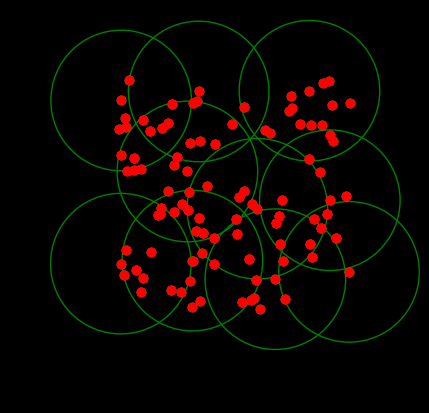

In [87]:
animate_greedy_centers_given_r(instance,3)

## Animate greedy centers

In [147]:
def animate_greedy_centers(places,k):

    info=Greedy_centers(places,k)
    centers=info["centers"]
    r=info["radius"]
    fig, ax = plt.subplots()

    # format figure
    fig.set_facecolor('black')
    ax.set_facecolor('black')
     # List of points
    ax.set_xlim(min([place[0] for place in places])-r, max([place[0] for place in places])+r)   # Setting x-axis limits
    ax.set_ylim(min([place[1] for place in places])-r, max([place[1] for place in places])+r)   # Setting x-axis limits
       
    # List of centers and their radii
    #radii = [0.5, 1]

    # Plot the points
    for x, y in places:
        ax.plot(x, y, 'o',color="white")  # 'bo' means blue color, round points

    # Plot the circles
    # for center in centers:
    #     circle = patches.Circle(center, radius, fc='none', ec='r',color="deeppink")  # fc is face color, ec is edge color
    #     ax.add_patch(circle)

    # # Set aspect of the plot to be equal, so circles aren't elliptic
    ax.set_aspect('equal', 'box')
    ax.set_title("Center Selection",color="white",fontsize=18)
    
    
    frames=[None]+[("punto",center) for center in centers ]+[("circle",center) for center in centers]
    def animate(frame):
        if frame != None:
            if frame[0]=="punto":
                ax.plot(frame[1][0], frame[1][1], 'o',color="deeppink")
            else:
                circle = patches.Circle(frame[1], r, fc='none', ec='palegreen')  # fc is face color, ec is edge color
                ax.add_patch(circle)
                for place in places:
                    if distance(place,frame[1])<=r and distance(place,frame[1])>0:
                        ax.plot(place[0], place[1], 'o',color="palegreen")
            # for place in places:
            #     if distance(place,center)<=2*r:
            #         ax.plot(place[0], place[1], 'o',color="red")


    ani = FuncAnimation(fig, animate, frames=frames, blit=False)
    ## Uncommment to save animation as .gif
    #ani.save("/Users/camiloariasabad/Downloads/knapsack.gif", writer=PillowWriter(fps=20))
    return HTML(ani.to_jshtml())

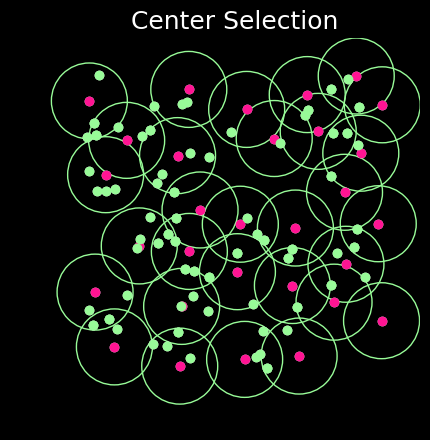

In [149]:
animate_greedy_centers(instance,30)